In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sympy import Symbol,expand
from scipy import stats

In [98]:
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [3]:
df_par   = pd.read_csv('/Users/ppu001/Downloads/PAR.csv',delimiter=',',skiprows=0)

In [4]:
df_par['Date']= pd.to_datetime(df_par['Datetime'])

In [6]:
#df_par['Date']

In [5]:
df_par.index=df_par['Date'] 

In [8]:
#df_par.head()

In [6]:
df_par1 = df_par[(df_par.index > '2011-1-1') & (df_par.index < '2022-12-31')]

In [13]:
df_par1.head(2)

,Datetime,PAR2,diffPAR,Date
Date,,,,
2011-01-01 00:30:00,01-Jan-2011 00:30:00,0.00167,0.01433,2011-01-01 00:30:00
2011-01-01 01:00:00,01-Jan-2011 01:00:00,-0.01700,-0.03567,2011-01-01 01:00:00


In [14]:
df_gpp= pd.read_csv('/Users/ppu001/Downloads/Hyytiala_NEE&GPP_2000-2022.txt')
df_gpp['date']= pd.to_datetime(df_gpp['date'])
df_gpp1 = df_gpp[(df_gpp['date'] > '2011-1-1') & (df_gpp['date'] < '2022-12-31')]
#davg_df_gpp1 = df_gpp1.groupby(pd.Grouper(freq='M', key='date')).sum()

In [15]:

df_gpp1.index=df_gpp1['date'] 

In [16]:
df_gpp1=df_gpp1.rename(columns={'date':'Datetime'})

In [128]:
df_cloud= pd.read_csv('/Users/ppu001/Downloads/cloud_30min.txt')

df_cloud['date']= pd.to_datetime(df_cloud['date'])
df_cloud1 = df_cloud[(df_gpp['date'] > '2011-1-1') & (df_cloud['date'] < '2022-12-31')]

/var/folders/8h/tq02b35s59sc5b9ych8935x40000gp/T/ipykernel_61485/3068997540.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cloud1 = df_cloud[(df_gpp['date'] > '2011-1-1') & (df_cloud['date'] < '2022-12-31')]


In [129]:
df_cloud1=df_cloud1.rename(columns={'date':'Datetime'})

In [130]:
df_gpp1['Datetime'] = pd.to_datetime(df_gpp1['Datetime'])
df_par1['Datetime'] = pd.to_datetime(df_par1['Datetime'])
df_cloud1['Datetime'] = pd.to_datetime(df_cloud1['Datetime'])

/var/folders/8h/tq02b35s59sc5b9ych8935x40000gp/T/ipykernel_61485/4241672464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_par1['Datetime'] = pd.to_datetime(df_par1['Datetime'])


In [131]:
combine=df_gpp1.merge(df_par1,  how='outer', on='Datetime')

In [132]:
combine_cloud=combine.merge(df_cloud1,  how='outer', on='Datetime')

In [16]:
#combine_cloud

In [134]:
combine_cloud.sort_values(by='Datetime', inplace = True)

In [135]:
combine_cloud.shape

(210359, 19)

In [137]:
combine_cloud['R_ratio']=combine['diffPAR']/combine['PAR2']

In [19]:
#combine_cloud['R_ratio'].plot()

In [158]:
xx=combine_cloud.loc[combine_cloud['cloud_par']>0.9]

In [124]:
xx.shape

(6579, 20)

In [125]:
combine_cloud.shape

(6579, 20)

(0.0, 1.0)

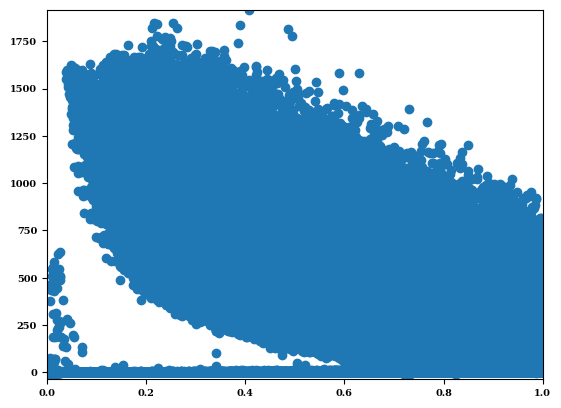

In [159]:
plt.scatter(combine_cloud['R_ratio'],combine_cloud['PAR2'])
plt.xlim(0,1)

In [82]:
combine_cloud=xx.dropna()

In [39]:
combine_cloud.head(2)

,Datetime,CO2_flux_flag,co2flux,NEE,TER,GPP,Evapotranspiration_flag,Evapotranspiration_u*,Evapotranspiration_flag_1,Evapotranspiration_gapfilling,Sensible_heat_flux_flag,Sensible_heat_flux,season,hour,dirunal,PAR2,diffPAR,Date,cloud_par,R_ratio
140371,2019-01-03 10:00:00,0.0,0.133,0.133,0.188,0.055,0.0,0.057,0.0,0.057,0.0,-4.265,4.0,10.0,2.0,32.46756,27.56344,2019-01-03 10:00:00,1.001498,0.848953
140373,2019-01-03 11:00:00,1.0,0.189,0.189,0.189,0.000,1.0,0.142,0.0,-0.077,0.0,-17.064,4.0,11.0,2.0,84.25244,57.86456,2019-01-03 11:00:00,0.907333,0.686800


(6579, 20)

In [152]:
combine_monthsum = combine_cloud.groupby(pd.Grouper(freq='D', key='Datetime')).mean()

In [186]:
#xx['R_ratio'].plot()

In [153]:
combine_monthmean = combine_cloud.groupby(pd.Grouper(freq='D', key='Datetime')).mean()

In [154]:
cc=combine_monthmean.loc[(combine_monthmean['PAR2']>0) & (combine_monthmean['PAR2']<2000)]

(24, 18)

In [155]:
gpp_par=cc.merge(combine_monthmean,  how='outer', on='Datetime')

In [156]:
gpp_par=gpp_par.dropna()

In [90]:
gpp_par.shape

(24, 36)

In [107]:
combine_monthmean['R_ratio'].shape
#combine_monthsum['GPP'].shape

(1410,)

Text(0, 0.5, 'Cumulative GPP')

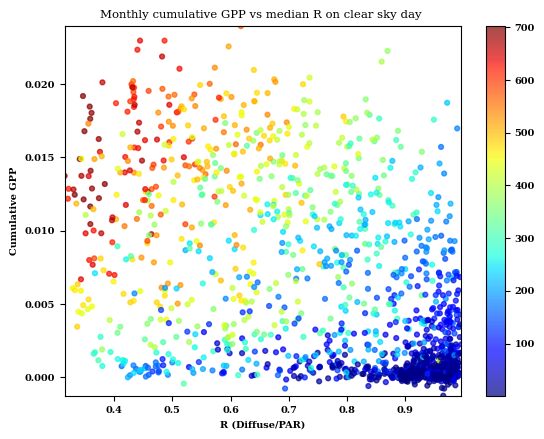

In [157]:
im=plt.scatter(gpp_par['R_ratio_x'], gpp_par['GPP_y']*10**-6*30*60, c=gpp_par['PAR2_y'],cmap='jet',s=12,alpha=0.7)
clb =plt.colorbar()
plt.title('Monthly cumulative GPP vs median R on clear sky day ')
plt.xlabel('R (Diffuse/PAR)')
plt.ylabel('Cumulative GPP')

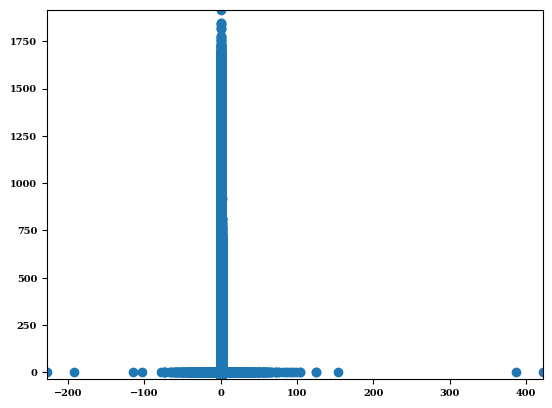

In [161]:
im=plt.scatter(combine_cloud['R_ratio'],combine_cloud['PAR2'])


In [33]:
combine_dsum = combine_cloud.groupby(pd.Grouper(freq='D', key='Datetime')).sum()
combine_dmean = combine_cloud.groupby(pd.Grouper(freq='D', key='Datetime')).median()

Text(0, 0.5, 'Cumulative GPP')

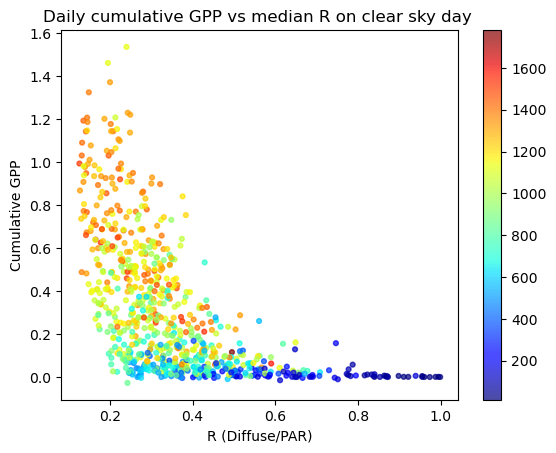

In [36]:
im=plt.scatter(combine_dmean['R_ratio'], combine_dsum['GPP']*10**-6*60*60, c=combine_dmean['PAR2'],cmap='jet',s=12,alpha=0.7)
clb =plt.colorbar()
plt.title('Daily cumulative GPP vs median R on clear sky day ')
plt.xlabel('R (Diffuse/PAR)')
plt.ylabel('Cumulative GPP')

In [37]:
combine_cloud_summer=combine_cloud[combine_cloud.Datetime.dt.month.isin([6,7,8])]

In [38]:
xx1=combine_cloud_summer.dropna()

In [40]:
xx1_dmean = xx1.groupby(pd.Grouper(freq='D', key='Datetime')).median()
xx1_dsum = xx1.groupby(pd.Grouper(freq='D', key='Datetime')).sum()

Text(0, 0.5, 'Cumulative GPP')

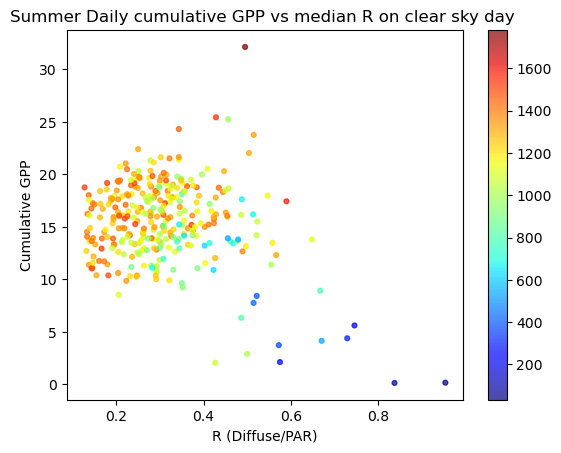

In [43]:
#plt.scatter(xxx['R_ratio'],xxx['GPP'])
#xxx['Date']
im=plt.scatter(xx1_dmean['R_ratio'], xx1_dmean['GPP'], c=xx1_dmean['PAR2'],cmap='jet',s=12,alpha=0.7,label='0.002X + 0.0011 r=0.87')
clb =plt.colorbar()
plt.title('Summer Daily cumulative GPP vs median R on clear sky day ')
plt.xlabel('R (Diffuse/PAR)')
plt.ylabel('Cumulative GPP') 

In [127]:
xxx=xx1.loc[combine_summer['PAR2']>50]

In [139]:
xxx_dsum = combine_cloud.groupby(pd.Grouper(freq='D', key='Datetime')).sum()
xxx_dmean = combine_cloud.groupby(pd.Grouper(freq='D', key='Datetime')).median()

In [113]:
plt.scatter(combine_dmean['R_ratio'], combine_dmean['PAR2'])

NameError: name 'combine_dmean' is not defined